<a href="https://colab.research.google.com/github/abhijitguinkatwa/machine-learning-project/blob/main/Petrol_price_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## Petrol Prices are going up continously these days and it has become very hard to predict what will be the price range in the next few months or even days.

### In this project we will try to forecast the different petrol prices for the upcoming dates given to us. 

### We will use LSTM and ARIMA forecasting models to predict the prices then we will see how we can implement the same using Auto Keras, which is an Auto ML Library.

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 

In [3]:
df1 = pd.read_csv("train_data.csv")
df1.head()

,Date,Petrol (USD)
0,6/9/2003,74.59
1,6/16/2003,74.47
2,6/23/2003,74.42
3,6/30/2003,74.35
4,7/7/2003,74.28


In [4]:
df1.isnull().sum()

Date            0
Petrol (USD)    2
dtype: int64

In [5]:
df2 = df1.dropna()

In [6]:
df2.rename(columns={"Petrol (USD)": "Petrol"}, inplace = True)
df2.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Date,Petrol
0,6/9/2003,74.59
1,6/16/2003,74.47
2,6/23/2003,74.42
3,6/30/2003,74.35
4,7/7/2003,74.28


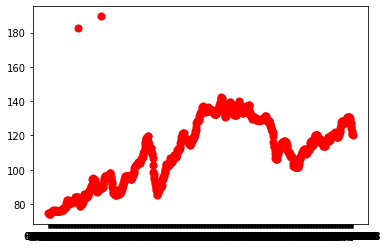

In [7]:
plt.scatter(df2.Date, df2.Petrol,color='red',label='Prices', s=50)


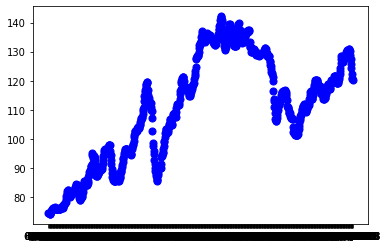

In [8]:
df3=df2[df2.Petrol<160]
plt.scatter(df3.Date, df3.Petrol,color='blue',label='Prices', s=50)

In [9]:
df4=df3.reset_index()['Petrol']
df4.head()

0    74.59
1    74.47
2    74.42
3    74.35
4    74.28
Name: Petrol, dtype: float64

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df4=scaler.fit_transform(np.array(df4).reshape(-1,1))

In [11]:
df4


array([[0.00559152],
       [0.00382578],
       [0.00309005],
       [0.00206004],
       [0.00103002],
       [0.        ],
       [0.0126545 ],
       [0.01309594],
       [0.01339023],
       [0.01809888],
       [0.02354326],
       [0.02707475],
       [0.02825191],
       [0.02972337],
       [0.02928193],
       [0.0285462 ],
       [0.02751619],
       [0.03266627],
       [0.02486757],
       [0.02707475],
       [0.02633902],
       [0.02633902],
       [0.02545615],
       [0.02530901],
       [0.02663331],
       [0.02633902],
       [0.02589759],
       [0.02575044],
       [0.02516186],
       [0.02545615],
       [0.02457328],
       [0.02486757],
       [0.03163626],
       [0.03281342],
       [0.033402  ],
       [0.03369629],
       [0.03281342],
       [0.03193055],
       [0.03104768],
       [0.03708064],
       [0.04679223],
       [0.04752796],
       [0.04973514],
       [0.05370806],
       [0.05400235],
       [0.05635668],
       [0.06165391],
       [0.074

In [12]:
training_size=int(len(df4)*0.65)
test_size=len(df4)-training_size
train_data,test_data=df4[0:training_size,:],df4[training_size:len(df4),:1]

In [13]:
train_data.shape
test_data.shape

(284, 1)

In [14]:
 import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [15]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [16]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [17]:
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [18]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
7/7 [==============================] - 10s 485ms/step - loss: 0.1650 - val_loss: 0.0714
Epoch 2/100
7/7 [==============================] - 2s 232ms/step - loss: 0.0323 - val_loss: 0.0158
Epoch 3/100
7/7 [==============================] - 2s 224ms/step - loss: 0.0191 - val_loss: 0.0039
Epoch 4/100
7/7 [==============================] - 2s 224ms/step - loss: 0.0119 - val_loss: 0.0063
Epoch 5/100
7/7 [==============================] - 2s 215ms/step - loss: 0.0082 - val_loss: 0.0044
Epoch 6/100
7/7 [==============================] - 1s 213ms/step - loss: 0.0072 - val_loss: 0.0053
Epoch 7/100
7/7 [==============================] - 2s 224ms/step - loss: 0.0064 - val_loss: 0.0031
Epoch 8/100
7/7 [==============================] - 2s 225ms/step - loss: 0.0058 - val_loss: 0.0033
Epoch 9/100
7/7 [==============================] - 2s 234ms/step - loss: 0.0056 - val_loss: 0.0029
Epoch 10/100
7/7 [==============================] - 2s 230ms/step - loss: 0.0054 - val_loss: 0.0029
Epoch 11

In [19]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [20]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

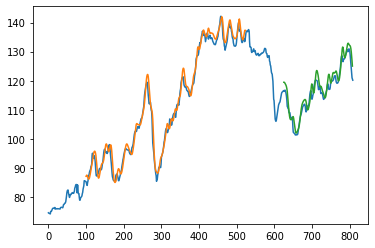

In [21]:

### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df4)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df4)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df4)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df4))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


In [22]:
df_test=pd.read_csv("test_data.csv")


In [23]:
model.save("prtrol price prediction")

In [24]:
!pip install --upgrade patsy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [25]:
!pip install statsmodels


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [26]:
!pip install --upgrade --no-deps statsmodels


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.8 MB 4.5 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [27]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot as plt
from pandas import read_csv
from pandas import datetime 
from matplotlib import pyplot

from sklearn.metrics import mean_squared_error
from math import sqrt

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """


In [28]:
df = pd.read_csv("train_data.csv")
df.head()

,Date,Petrol (USD)
0,6/9/2003,74.59
1,6/16/2003,74.47
2,6/23/2003,74.42
3,6/30/2003,74.35
4,7/7/2003,74.28


In [29]:
df.rename(columns={"Petrol (USD)": "Petrol"}, inplace = True)
df.head()

,Date,Petrol
0,6/9/2003,74.59
1,6/16/2003,74.47
2,6/23/2003,74.42
3,6/30/2003,74.35
4,7/7/2003,74.28


In [30]:
df2 = df.dropna()
df3=df2[df2.Petrol<160]
df3.head()

,Date,Petrol
0,6/9/2003,74.59
1,6/16/2003,74.47
2,6/23/2003,74.42
3,6/30/2003,74.35
4,7/7/2003,74.28


In [31]:
df4=df3.reset_index()['Petrol']
df4.head()

0    74.59
1    74.47
2    74.42
3    74.35
4    74.28
Name: Petrol, dtype: float64

In [32]:
model1 = ARIMA(df4.values, order=(5,1,0))
model_fit1 = model1.fit()
output1= model_fit1.forecast(steps=30)
output1

array([119.80670595, 119.52143347, 119.30634688, 119.14818591,
       119.02925477, 118.93899198, 118.87071704, 118.81917609,
       118.78030427, 118.75097698, 118.72884   , 118.71212989,
       118.69951735, 118.68999809, 118.68281349, 118.67739086,
       118.67329807, 118.67020899, 118.66787748, 118.66611776,
       118.66478959, 118.66378715, 118.66303054, 118.66245949,
       118.66202848, 118.66170317, 118.66145764, 118.66127233,
       118.66113246, 118.66102689])

In [33]:
!pip install git+https://github.com/keras-team/keras-tuner.git@1.0.2rc1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/keras-team/keras-tuner.git (to revision 1.0.2rc1) to /tmp/pip-req-build-qki6ur2_
  Running command git clone -q https://github.com/keras-team/keras-tuner.git /tmp/pip-req-build-qki6ur2_
  Running command git checkout -q 0fb69434a132093518e0e53d40020145ae192629
  Created wheel for keras-tuner: filename=keras_tuner-1.0.2rc1-py3-none-any.whl size=85445 sha256=036d7cdbeb1321d859446169bd50a8b8c4af254605f13ec783f3b0528df0976c
  Stored in directory: /tmp/pip-ephem-wheel-cache-w3z4fs65/wheels/44/e5/92/e83049ca00432aec622a4fa0200e254d88aefae9d74aa86941
Successfully built keras-tuner


In [34]:
!pip install autokeras


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 162 kB 5.1 MB/s 
     |████████████████████████████████| 135 kB 42.4 MB/s 
     |████████████████████████████████| 1.6 MB 35.4 MB/s 
  Attempting uninstall: keras-tuner
    Found existing installation: keras-tuner 1.0.2rc1
    Uninstalling keras-tuner-1.0.2rc1:
      Successfully uninstalled keras-tuner-1.0.2rc1


In [35]:
!pip show autokeras


Name: autokeras
Version: 1.0.19
Summary: AutoML for deep learning
Home-page: http://autokeras.com
Author: DATA Lab, Keras Team
Author-email: jhfjhfj1@gmail.com
License: Apache License 2.0
Location: /usr/local/lib/python3.7/dist-packages
Requires: tensorflow, pandas, packaging, keras-tuner
Required-by: 


In [36]:
import numpy as np
import pandas as pd
import tensorflow as tf


import autokeras as ak

In [37]:
reg = ak.StructuredDataRegressor(
    overwrite=True, max_trials=3
)


In [41]:
reg.fit(x=X_train, y=y_train, verbose=0)

ValueError: ignored

In [40]:
# evaluate the model
mae, _  = reg.evaluate(X_test, ytest, verbose=0)
#print('MAE: %.3f' % mae)
# use the model to make a prediction
yhat_test = reg.predict(X_test)

# get the best performing model
model = reg.export_model()

NotFoundError: ignored